# Práctica 5 - Mejorar calidad (iluminación) de una imagen a color con ecualización V

**Algoritmo para mejorar imágenes a color**

1. **Análisis inicial**:
    - Descomponer la imagen en sus canales RGB.
    - Evaluar los histogramas de cada canal para identificar subutilización.
2. **Conversión al espacio HSV**:
    - Convertir la imagen RGB a HSV para separar la luminosidad del color.
3. **Ecualización del canal V**:
    - Aplicar una ecualización del histograma únicamente en el canal V.
    - Aumentar el contraste sin modificar H y S.
4. **Reconversión a RGB**:
    - Convertir la imagen mejorada en HSV de vuelta al espacio RGB.
5. **Resultado final**:
    - Comparar la imagen original y la mejorada, evaluando la preservación de colores y el aumento en el contraste.

In [1]:
#importamos las librerías a utilizar
import cv2
import matplotlib.pyplot as plt

In [3]:
#cargamos la imgen a la cual se hará la modificación
img_bgr1 = cv2.imread('Im004_ACRIMA.jpg')
img_bgr1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)

In [4]:
#convertimos a HSV
img_hsv = cv2.cvtColor(img_bgr1, cv2.COLOR_RGB2HSV)
#separamos los canales H, S y V
img_h, img_s, img_v = cv2.split(img_hsv)

In [5]:
#ecualizamos solo el canal de valor (v)
img_v_eq = cv2.equalizeHist(img_v)
#combinamos los canales con el V ya ecualizado
img_hsv_eq = cv2.merge((img_h, img_s, img_v_eq))
#convertimos a BGR y luego a RGB para visualizarlo
img_bgr_eq = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2BGR)#convertimos a BGR
img_rgb_eq = cv2.cvtColor(img_bgr_eq, cv2.COLOR_BGR2RGB)#LUEGO A RGB

(np.float64(-0.5), np.float64(405.5), np.float64(405.5), np.float64(-0.5))

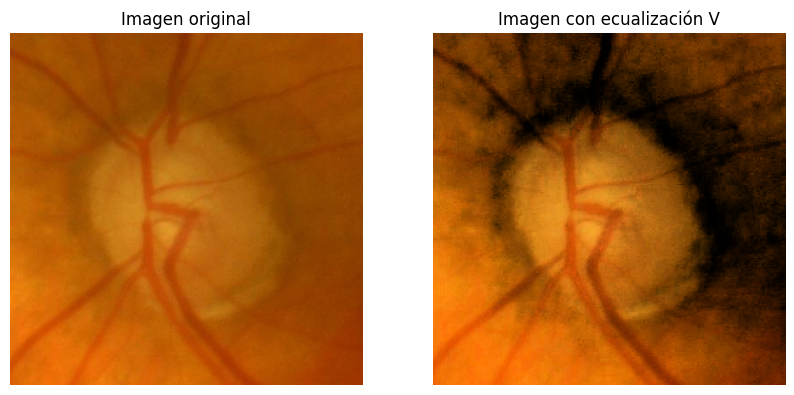

In [7]:
#mostramos la  imagen original y la mejorada
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Imagen original')
plt.axis('off')
plt.imshow(img_bgr1)

plt.subplot(1,2,2)
plt.title('Imagen con ecualización V')
plt.imshow(img_rgb_eq)
plt.axis('off')

## Aplicación a otras dos imágenes médicas

In [9]:
#cargamos las imagenes a las cuales se hará la modificación
#Imagen 1
img_bgr_med1 = cv2.imread('polyp_colonic.jpg')
img_bgr_med1 = cv2.cvtColor(img_bgr_med1, cv2.COLOR_BGR2RGB)
#Imagen 2
img_bgr_med2 = cv2.imread('esophagus_endoscopy.jpg')
img_bgr_med2 = cv2.cvtColor(img_bgr_med2, cv2.COLOR_BGR2RGB)

Para no repetir lo mismo, generamos una función que lleva por nombre ecualizacion_V, la cual incluye el mismo proceso que se aplicó a la primera imagen:

* Conversión a HSV de la imagen original
* Separación de los canales H, S y V
* Ecualización del canal V
* Aplicación del canal V con el resto de canales
* Conversión a BGR y luego a RGB
* Visualización RGB





In [10]:
def ecualizacion_V(img):
  img_bgr = img
  #convertimos a HSV
  img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2HSV)
  #separamos los canales H, S y V
  img_h, img_s, img_v = cv2.split(img_hsv)
  #ecualizamos solo el canal de valor (v)
  img_v_eq = cv2.equalizeHist(img_v)
  #combinamos los canales con el V ya ecualizado
  img_hsv_eq = cv2.merge((img_h, img_s, img_v_eq))
  #convertimos a BGR y luego a RGB para visualizarlo
  img_bgr_eq = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2BGR)#convertimos a BGR
  img_rgb_eq = cv2.cvtColor(img_bgr_eq, cv2.COLOR_BGR2RGB)#LUEGO A RGB
  #mostramos la  imagen original y la mejorada
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.title('Imagen original')
  plt.axis('off')

  plt.imshow(img_bgr)
  plt.subplot(1,2,2)
  plt.title('Imagen con ecualización V')
  plt.imshow(img_rgb_eq)
  plt.axis('off')


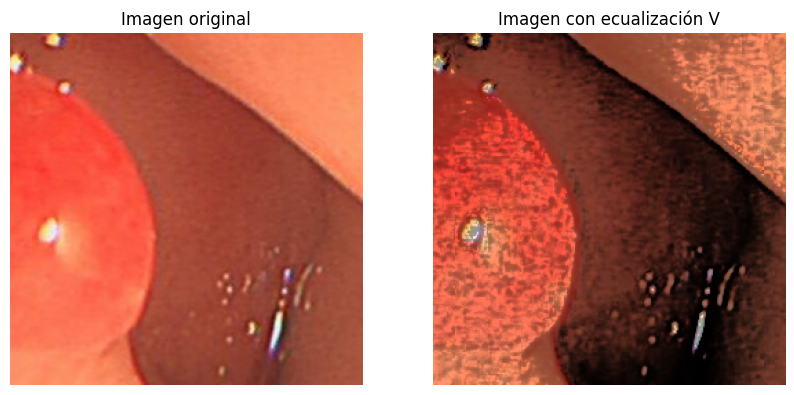

In [12]:
#aplicamos la función a ambas imágenes médicas
ecualizacion_V(img_bgr_med1)



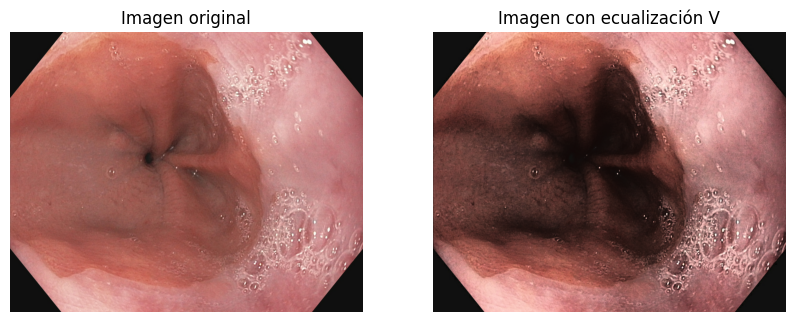

In [13]:
ecualizacion_V(img_bgr_med2)

Referencias imagenes médicas:

* Mortazavi, M. (2024). Colonoscopy_CP_CHILD. Kaggle.com. https://www.kaggle.com/datasets/mahdieh002/colonoscopy-cp-child

* 山巅之鹰. (2020). Esophageal Endoscopy Images. Kaggle.com. https://www.kaggle.com/datasets/chopinforest/esophageal-endoscopy-images

‌